In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Datenvorbereitigung

In [2]:
# https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice
# https://data.bls.gov/timeseries/CUUR0000SA0L1E?output_view=pct_12mths

bigmac_path = 'C:/Users/pat_h/OneDrive/p-spohr-repos/HTW-Berlin-Pytorium/4-Wichtige-Libraries/daten/BigmacPrice.csv'
inflation_path = 'C:/Users/pat_h/OneDrive/p-spohr-repos/HTW-Berlin-Pytorium/4-Wichtige-Libraries/daten/inflation.csv'

bmac_df = pd.read_csv(bigmac_path, sep=',', header='infer')
in_df = pd.read_csv(inflation_path, sep=',', header='infer')

# im gleichem Ordner
# daten = pd.read_csv('BigmacPrice.csv', sep=',', header='infer')

In [3]:
bmac_df.head(5)

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


In [4]:
bmac_df.tail(5)

,date,currency_code,name,local_price,dollar_ex,dollar_price
1941,2022-07-01,AED,United Arab Emirates,18.00,3,6.00
1942,2022-07-01,USD,United States,5.15,1,5.15
1943,2022-07-01,UYU,Uruguay,255.00,41,6.22
1944,2022-07-01,VES,Venezuela,10.00,5,2.00
1945,2022-07-01,VND,Vietnam,69000.00,23417,2.95


In [5]:
bmac_df.shape

(1946, 6)

In [24]:
bmac_df.columns = ['Datum', 'Währung', 'Land', 'Preis','DK', 'DP'] # Dollar-Kurs, Dollar-Preis

In [25]:
bmac_df['Datum'] = pd.to_datetime(bmac_df['Datum'], format='%Y-%m-%d')

# Lesen Sie die Dokumentation Python-datetime für mehr Info über format
# https://docs.python.org/3/library/datetime.html
# https://docs.python.org/3/library/datetime.html#format-codes

In [26]:
# Datumsbereich
print(f'Anfangsdatum: {bmac_df.head(n=1).Datum.iloc[0]}')
print(f'Enddatum: {bmac_df.tail(n=1).Datum.iloc[0]}')

Anfangsdatum: 2000-04-01 00:00:00
Enddatum: 2022-07-01 00:00:00


## Dateneinblicke

In [27]:
# Anzahl eindeutiger Länder
bmac_df.Land.unique().size

74

In [28]:
# manche Länder haben gleiche Währung und manche Länder haben mehr Daten als andere
bmac_df.groupby('Währung').nunique()

,Datum,Land,Preis,DK,DP
Währung,,,,,
AED,31,2,9,1,9
ARS,37,1,25,22,30
AUD,37,1,24,1,24
AZN,9,1,3,1,3
BHD,9,1,4,1,4
BRL,37,1,28,5,28
CAD,37,1,28,1,28
CHF,37,1,4,1,4
CLP,37,1,23,36,35


In [29]:
# USA Beschreibung
bmac_df[bmac_df['Land'] == 'United States'].describe()

,Datum,Preis,DK,DP
count,37,37.000000,37.0,37.000000
mean,2012-10-12 14:55:08.108108032,3.840541,1.0,3.840541
min,2000-04-01 00:00:00,2.240000,1.0,2.240000
25%,2007-06-01 00:00:00,3.000000,1.0,3.000000
50%,2013-07-01 00:00:00,4.180000,1.0,4.180000
75%,2018-01-01 00:00:00,4.610000,1.0,4.610000
max,2022-07-01 00:00:00,5.150000,1.0,5.150000
std,NaN,0.915987,0.0,0.915987


In [30]:
usa_daten = bmac_df[bmac_df['Land'] == 'United States']

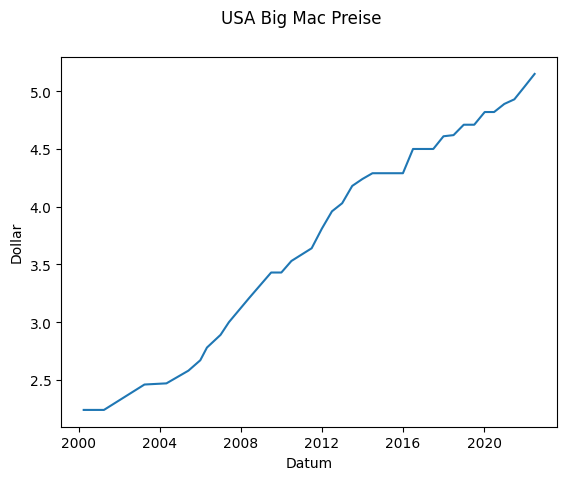

In [31]:
usa_fig, usa_ax = plt.subplots()
usa_fig.suptitle('USA Big Mac Preise')
usa_ax.set_ylabel('Dollar')
usa_ax.set_xlabel('Datum')
usa_ax.plot(usa_daten['Datum'], usa_daten['Preis'])

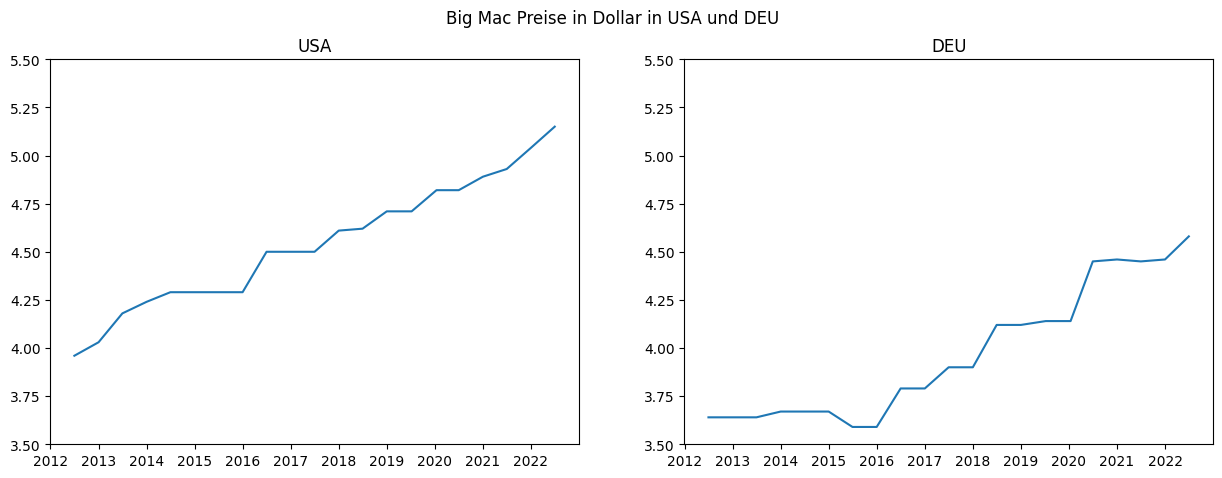

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Big Mac Preise in Dollar in USA und DEU')

axs[0].set_ylim([3.5,5.5])
axs[1].set_ylim([3.5,5.5])

axs[0].set_title('USA')
axs[1].set_title('DEU')

axs[0].plot(usa_daten[usa_daten['Datum'] > '2012']['Datum'], usa_daten[usa_daten['Datum'] > '2012']['DP'])

# Deutschland Preise
ger_daten = bmac_df[bmac_df['Land'] == 'Germany']

axs[1].plot(ger_daten[ger_daten['Datum'] > '2012']['Datum'], ger_daten[ger_daten['Datum'] > '2012']['DP'])

# import matplotlib.dates as mdates
# axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [33]:
df_max = pd.DataFrame(columns=bmac_df.columns)
df_max

,Datum,Währung,Land,Preis,DK,DP


In [34]:
# Höchster Preis pro Land
list(bmac_df.groupby(['Land'])['DP'].max().items())

[('Argentina', 5.0),
 ('Australia', 6.7),
 ('Austria', 4.35),
 ('Azerbaijan', 4.7),
 ('Bahrain', 1.6),
 ('Belgium', 4.6),
 ('Brazil', 11.25),
 ('Britain', 3.69),
 ('Canada', 6.88),
 ('Chile', 4.35),
 ('China', 4.07),
 ('Colombia', 4.85),
 ('Costa Rica', 4.4),
 ('Croatia', 4.0),
 ('Czech Republic', 4.72),
 ('Denmark', 7.0),
 ('Egypt', 2.88),
 ('Estonia', 3.4),
 ('Euro area', 4.65),
 ('Finland', 5.25),
 ('France', 4.7),
 ('Germany', 4.58),
 ('Greece', 4.0),
 ('Guatemala', 3.71),
 ('Honduras', 3.78),
 ('Hong Kong', 3.14),
 ('Hungary', 4.65),
 ('India', 2.86),
 ('Indonesia', 2.86),
 ('Ireland', 5.0),
 ('Israel', 5.83),
 ('Italy', 5.1),
 ('Japan', 4.21),
 ('Jordan', 2.3),
 ('Kuwait', 1.3),
 ('Latvia', 3.0),
 ('Lebanon', 5.95),
 ('Lithuania', 4.47),
 ('Malaysia', 3.6),
 ('Mexico', 3.5),
 ('Moldova', 3.16),
 ('Netherlands', 4.5),
 ('New Zealand', 7.1),
 ('Nicaragua', 3.97),
 ('Norway', 9.0),
 ('Oman', 1.42),
 ('Pakistan', 3.61),
 ('Peru', 5.0),
 ('Philippines', 3.72),
 ('Poland', 4.48),
 ('Po

In [35]:
# Kreige Daten wo Land und höchster Preis übereinstimmen
for land, dp in bmac_df.groupby(['Land'])['DP'].max().items():
    if df_max.empty == True:
        df_max = bmac_df.loc[(bmac_df['Land'] == land) & (bmac_df['DP'] == dp)]
    else: 
        df_max = pd.concat([df_max, bmac_df.loc[(bmac_df['Land'] == land) & (bmac_df['DP'] == dp)]])

In [36]:
df_max.groupby(['Währung']).max().sort_values('DP', axis=0, ascending=False)

,Datum,Land,Preis,DK,DP
Währung,,,,,
BRL,2013-01-01,Brazil,11.25,1,11.25
VEF,2013-01-01,Venezuela,39.00,4,9.75
NOK,2011-07-01,Norway,45.00,5,9.00
TRY,2013-07-01,Turkey,8.50,1,8.50
SEK,2011-07-01,Sweden,48.40,6,8.07
NZD,2022-07-01,New Zealand,7.10,1,7.10
DKK,2008-06-01,Denmark,28.00,4,7.00
CAD,2020-07-01,Canada,6.88,1,6.88
AUD,2022-07-01,Australia,6.70,1,6.70


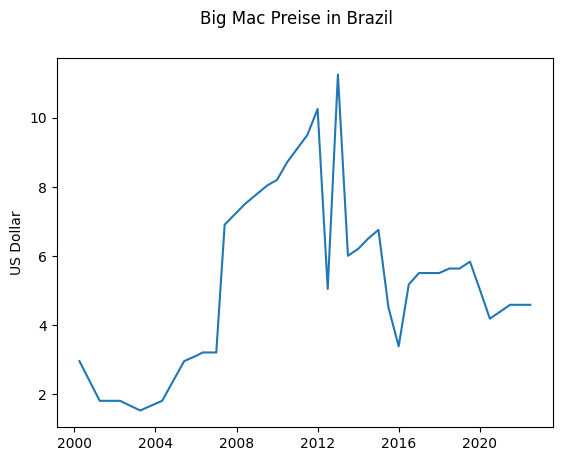

In [37]:
# Die Preise basiert auf US Dollar in Brazil stieg von 2008 bis 2012 schnell auf, dann schwankten enorm in 2013 und 2014
fig, ax = plt.subplots(1,1)
fig.suptitle('Big Mac Preise in Brazil')
brazil_daten = bmac_df[bmac_df['Land'] == 'Brazil']
ax.set_ylabel('US Dollar')
ax.plot(brazil_daten['Datum'], brazil_daten['DP'])

In [38]:
# Die Preise in Europe ohne 'Euro Area'
bmac_df.loc[(bmac_df['Währung'] == 'EUR') & (bmac_df['Land'] != 'Euro area')]

,Datum,Währung,Land,Preis,DK,DP
522,2011-07-01,EUR,Austria,3.09,1,3.09
523,2011-07-01,EUR,Belgium,3.75,1,3.75
534,2011-07-01,EUR,Estonia,2.20,1,2.20
536,2011-07-01,EUR,Finland,3.75,1,3.75
537,2011-07-01,EUR,France,3.50,1,3.50
...,...,...,...,...,...,...
1916,2022-07-01,EUR,Netherlands,4.50,1,4.50
1925,2022-07-01,EUR,Portugal,4.00,1,4.00
1930,2022-07-01,EUR,Slovakia,3.90,1,3.90
1931,2022-07-01,EUR,Slovenia,3.20,1,3.20


In [40]:
bmac_df.index = bmac_df.Datum

### Interaktives Plotten

In [41]:
land_wahl_widget = widgets.Dropdown(options=tuple(bmac_df.Land.unique()))

plot_widget = widgets.Button(description='Plot')
clear_widget = widgets.Button(description='Clear')

output_widget = widgets.Output()

def plot_preise_land(button):
    with output_widget:
        print(land_wahl_widget.value)
        bmac_df[bmac_df['Land'] == land_wahl_widget.value].groupby(pd.Grouper(freq='YE'))['Preis'].mean().plot(xlabel='Datum', title=f'{land_wahl_widget.value} Big Mac Preise')
        plt.show()

def clear_plot(button):
    output_widget.clear_output()

plot_widget.on_click(plot_preise_land)
clear_widget.on_click(clear_plot)

display(land_wahl_widget)
display(widgets.HBox([plot_widget, clear_widget]))
display(output_widget)

Dropdown(options=('Argentina', 'Australia', 'Brazil', 'Britain', 'Canada', 'Chile', 'China', 'Czech Republic',…

Output()

In [42]:
# Die Länder mit den höchsten Preisen
bmac_df.groupby(pd.Grouper('DP', freq='YE')).max()['Land'].value_counts()

Land
Venezuela        9
Vietnam          9
Uruguay          3
United States    2
Name: count, dtype: int64

<BarContainer object of 4 artists>

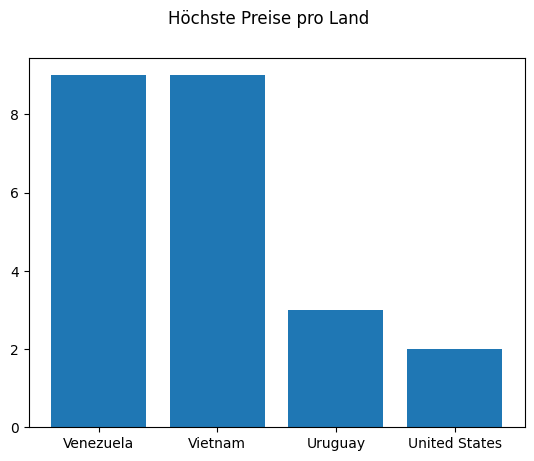

In [43]:
fig, ax = plt.subplots()
x = bmac_df.groupby(pd.Grouper('DP', freq='YE')).max()['Land'].value_counts().index
y = bmac_df.groupby(pd.Grouper('DP', freq='YE')).max()['Land'].value_counts()
fig.suptitle('Höchste Preise pro Land')
ax.bar(x, y)

In [44]:
usa_preise_df = bmac_df.loc[bmac_df['Land'] == 'United States'].groupby(pd.Grouper(freq='YE'))['Preis'].mean()

In [45]:
pd.date_range(usa_preise_df.index.values[0], usa_preise_df.index.values[-1], freq='YE-JAN')

DatetimeIndex(['2001-01-31', '2002-01-31', '2003-01-31', '2004-01-31',
               '2005-01-31', '2006-01-31', '2007-01-31', '2008-01-31',
               '2009-01-31', '2010-01-31', '2011-01-31', '2012-01-31',
               '2013-01-31', '2014-01-31', '2015-01-31', '2016-01-31',
               '2017-01-31', '2018-01-31', '2019-01-31', '2020-01-31',
               '2021-01-31', '2022-01-31'],
              dtype='datetime64[ns]', freq='YE-JAN')

In [46]:
pd.Timestamp.today().year

2024

In [47]:
jahre = pd.DataFrame(pd.Timestamp.today().year - pd.to_datetime(usa_preise_df.index.values).year)

In [48]:
jahre.index = usa_preise_df.index
jahre.columns = ['Jahre']

In [49]:
jahre.head()

,Jahre
Datum,
2000-12-31,24
2001-12-31,23
2002-12-31,22
2003-12-31,21
2004-12-31,20


In [50]:
np.full((2), 1)

array([1, 1])

In [51]:
zinsen = pd.Series(np.full((len(jahre)), 0.03))
zinsen.index = jahre.index
zinsen = pd.DataFrame(zinsen, columns=['Zinsen'])
print(zinsen.head())
print(zinsen.shape)

            Zinsen
Datum             
2000-12-31    0.03
2001-12-31    0.03
2002-12-31    0.03
2003-12-31    0.03
2004-12-31    0.03
(23, 1)


In [52]:
usa_preise_df = pd.DataFrame(usa_preise_df)
jahre = pd.DataFrame(jahre)
print(usa_preise_df.shape)
print(jahre.shape)

(23, 1)
(23, 1)


In [53]:
usa_preise_df = pd.DataFrame({'Preise': usa_preise_df.Preis, 'Zinsen': zinsen.Zinsen, 'Jahre': jahre.Jahre}, index=jahre.index)

In [54]:
usa_preise_df.tail()

,Preise,Zinsen,Jahre
Datum,,,
2018-12-31,4.615,0.03,6
2019-12-31,4.710,0.03,5
2020-12-31,4.820,0.03,4
2021-12-31,4.910,0.03,3
2022-12-31,5.095,0.03,2


In [55]:
np.array(([5.5, 0.03, 1],
          [5.69, 0.03, 0])).shape

(2, 3)

In [56]:
neu_bmac_df = pd.DataFrame(np.array(([5.5, 0.03, 1],
                               [5.69, 0.03, 0])))

neu_bmac_df.index = [pd.Timestamp(day=31, month=12, year=2023), pd.Timestamp(day=31, month=12, year=2024)]

In [57]:
neu_bmac_df.columns = usa_preise_df.columns

In [58]:
usa_preise_df = pd.concat([usa_preise_df, neu_bmac_df], join='outer')

In [59]:
usa_preise_df.tail()

,Preise,Zinsen,Jahre
2020-12-31,4.820,0.03,4.0
2021-12-31,4.910,0.03,3.0
2022-12-31,5.095,0.03,2.0
2023-12-31,5.500,0.03,1.0
2024-12-31,5.690,0.03,0.0


In [60]:
def inflation(data: pd.Series):
    return data.iloc[0] * (1 + data.iloc[1]) ** data.iloc[2]

In [61]:
inflation(pd.Series((10, 0.01, 10)))

np.float64(11.046221254112044)

In [62]:
usa_preise_df.shape

(25, 3)

In [63]:
usa_preise_df.apply(inflation, axis=1)

2000-12-31    4.553459
2001-12-31    4.420834
2002-12-31    4.502843
2003-12-31    4.576325
2004-12-31    4.461095
2005-12-31    4.524046
2006-12-31    4.639130
2007-12-31    4.867636
2008-12-31    5.151108
2009-12-31    5.343828
2010-12-31    5.263812
2011-12-31    5.345463
2012-12-31    5.539081
2013-12-31    5.682280
2014-12-31    5.731803
2015-12-31    5.597477
2016-12-31    5.567455
2017-12-31    5.534432
2018-12-31    5.510551
2019-12-31    5.460181
2020-12-31    5.424952
2021-12-31    5.365290
2022-12-31    5.405286
2023-12-31    5.665000
2024-12-31    5.690000
dtype: float64

In [64]:
bmac_df.loc[bmac_df['Land'] == 'United States'].groupby(pd.Grouper(freq='YE'))['Preis'].mean().head()

Datum
2000-12-31    2.24
2001-12-31    2.24
2002-12-31    2.35
2003-12-31    2.46
2004-12-31    2.47
Freq: YE-DEC, Name: Preis, dtype: float64

In [65]:
inflation(usa_preise_df.iloc[1])

np.float64(4.420833784923597)

In [66]:
usa_preise_df['Adj Preise'] = usa_preise_df.apply(inflation, axis=1)

### Adjustierte Preise

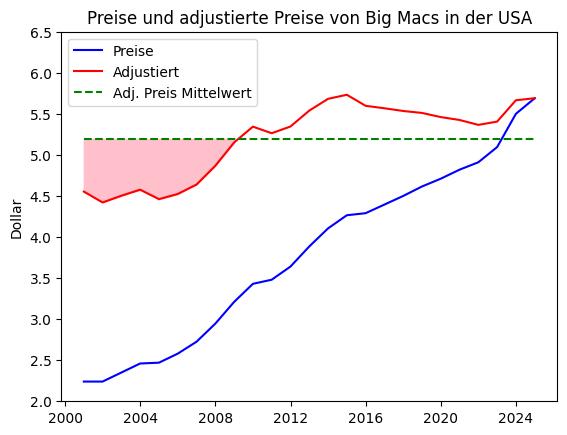

In [68]:
fig, ax = plt.subplots()
zeit = usa_preise_df.index
mean_adj_preise = np.full((len(zeit),), usa_preise_df['Adj Preise'].mean())

ax.set_title('Preise und adjustierte Preise von Big Macs in der USA')
ax.set_ylim((2,6.5))
ax.plot(zeit, usa_preise_df['Preise'], color='blue', label='Preise')
ax.plot(zeit, usa_preise_df['Adj Preise'], color='red', label='Adjustiert')
ax.plot(zeit, mean_adj_preise, linestyle='--', color='green', label='Adj. Preis Mittelwert')

ax.fill_between(zeit, usa_preise_df['Adj Preise'], mean_adj_preise, color='pink', where=usa_preise_df['Adj Preise'] < mean_adj_preise)
ax.set_ylabel('Dollar')
ax.legend(loc='upper left')
# fig.savefig('adjustiert0.png', format='png')

In [83]:
usa_preise_df.head(5)

,Preise,Zinsen,Jahre,Adj Preise,inflation
2000-12-31,2.24,0.024333,24.0,4.553459,3.988773
2001-12-31,2.24,0.026583,23.0,4.420834,4.095574
2002-12-31,2.35,0.023167,22.0,4.502843,3.889451
2003-12-31,2.46,0.014500,21.0,4.576325,3.328344
2004-12-31,2.47,0.017667,20.0,4.461095,3.505968


In [84]:
in_df.head(5)

2000-12-31    2.433333
2001-12-31    2.658333
2002-12-31    2.316667
2003-12-31    1.450000
2004-12-31    1.766667
dtype: float64

In [71]:
in_df = in_df.drop(columns=['Year', 'HALF1', 'HALF2'])

In [72]:
in_df.index = usa_preise_df.index

In [74]:
in_df = in_df.mean(axis=1)

In [76]:
usa_preise_df['Zinsen'] = in_df / 100

In [85]:
# Mittelwert des Zinssatzes
usa_preise_df['Zinsen'].mean()

np.float64(0.023883333333333326)

In [79]:
usa_preise_df['inflation'] = usa_preise_df.apply(inflation, axis=1)

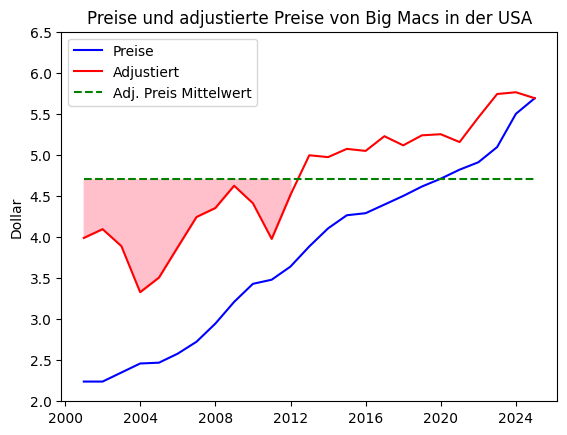

In [81]:
fig, ax = plt.subplots()
zeit = usa_preise_df.index
mean_adj_preise = np.full((len(zeit),), usa_preise_df['inflation'].mean())

ax.set_title('Preise und adjustierte Preise von Big Macs in der USA')
ax.set_ylim((2,6.5))
ax.plot(zeit, usa_preise_df['Preise'], color='blue', label='Preise')
ax.plot(zeit, usa_preise_df['inflation'], color='red', label='Adjustiert')
ax.plot(zeit, mean_adj_preise, linestyle='--', color='green', label='Adj. Preis Mittelwert')

ax.fill_between(zeit, usa_preise_df['inflation'], mean_adj_preise, color='pink', where=usa_preise_df['inflation'] < mean_adj_preise)
ax.set_ylabel('Dollar')
ax.legend(loc='upper left')
# fig.savefig('adjustiert1.png', format='png')